Using device: cpu
 Retrying in 1 seconds


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[  1.51410812  -6.31334738 -13.68126577 -17.4615358  -17.4425805
 -12.30349832 -17.63590316 -17.65965395   3.81752851 -18.58660164]
[ 4.43458914  4.50280349  5.39955808  5.25525965  5.00466574  5.5092867
  4.74159927 -3.59950906  5.37278004  5.61184373]


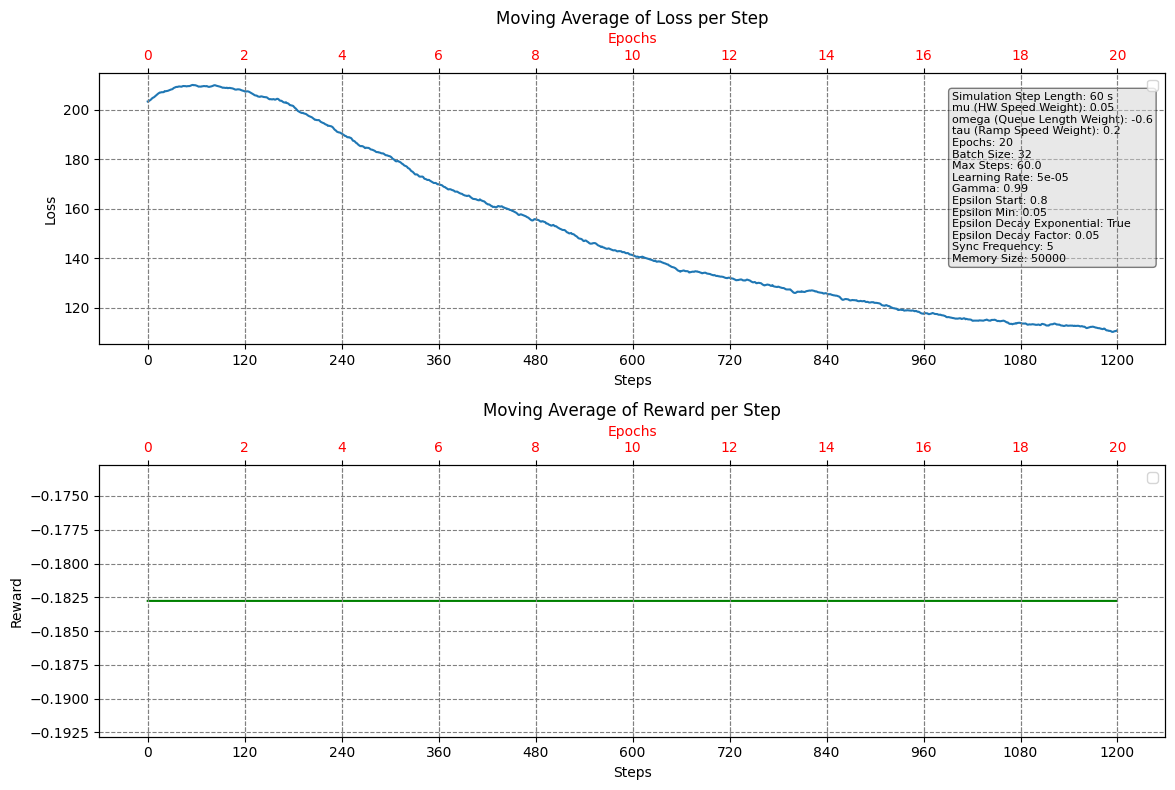

In [1]:
import pickle
from matplotlib import pyplot as plt
import numpy as np
from DQNAgent import DqnAgent
# from maps.SumoEnv import SumoEnv

agent = DqnAgent(observation_space_n=3012)
# Loading the results from the file
with open('training_results_1.pkl', 'rb') as file:
    results = pickle.load(file)

# Extracting the values
# agent = results["agent"]
model = results["model"]
total_step_loss = results["total_step_loss"]
total_step_rewards = results["total_step_rewards"]
print(total_step_rewards[:10])
print(total_step_rewards[-10:])
epochs = results["epochs"]
steps = results["steps"]
simulationStepLength = results["simulationStepLength"]
mu = results["mu"]
omega = results["omega"]
tau = results["tau"]
batch_size = results["batch_size"]
max_steps = results["max_steps"]
learning_rate = results["learning_rate"]
gamma = results["gamma"]
eps_start = results["eps_start"]
eps_min = results["eps_min"]
eps_dec_factor = results["eps_dec_factor"]
eps_dec_exp = results["eps_dec_exp"]
sync_freq = results["sync_freq"]
mem_size = results["mem_size"]

# Define helper functions for visualization
def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size) / window_size, mode='valid')

def interpolate_to_steps(data, steps):
    return np.interp(np.linspace(0, len(data) - 1, steps), np.arange(len(data)), data)

# Calculation of moving averages
smoothed_loss = moving_average(total_step_loss, 200)
smoothed_reward = moving_average(total_step_rewards, 20000)

# Interpolate the smoothed data to match the number of steps
interpolated_loss = interpolate_to_steps(smoothed_loss, steps)
interpolated_reward = interpolate_to_steps(smoothed_reward, steps)

# Create two subplots
fig, axs = plt.subplots(2, 1, figsize=(12, 8))

# Text box with the parameters
param_text = (f"Simulation Step Length: {simulationStepLength} s\n"
              f"mu (HW Speed Weight): {mu}\n"  
              f"omega (Queue Length Weight): {omega}\n"
              f"tau (Ramp Speed Weight): {tau}\n"
              f"Epochs: {epochs}\n"
              f"Batch Size: {batch_size}\n"
              f"Max Steps: {max_steps}\n"
              f"Learning Rate: {learning_rate}\n"
              f"Gamma: {gamma}\n"
              f"Epsilon Start: {eps_start}\n"
              f"Epsilon Min: {eps_min}\n"
              f"Epsilon Decay Exponential: {eps_dec_exp}\n"
              f"Epsilon Decay Factor: {eps_dec_factor}\n"
              f"Sync Frequency: {sync_freq}\n"
              f"Memory Size: {mem_size}")

# Calculation of tick intervals for epochs
epoch_interval = max(1, epochs // 10)  # Ensures that a minimum of 1 and a maximum of 10 ticks are used
epoch_ticks = np.arange(0, epochs + 1, epoch_interval)

# Setting the ticks for the steps axis
step_ticks = np.linspace(0, steps, 11)

# Plot for Loss
axs[0].plot(interpolated_loss)
axs[0].set_title('Moving Average of Loss per Step')
axs[0].set_ylabel('Loss')
axs[0].grid(True, linestyle='--', color='gray')
axs[0].legend()

# Setting the ticks for the x-axis of the steps
axs[0].set_xticks(step_ticks)
axs[0].set_xlabel('Steps')

# Adding a second x-axis for epochs
ax2 = axs[0].twiny()
ax2.set_xticks(np.linspace(0, steps, len(epoch_ticks)))  
ax2.set_xticklabels(epoch_ticks, color='red')  
ax2.set_xlabel('Epochs', color='red')  
ax2.grid(True, linestyle='--', color='gray')
ax2.set_xlim(axs[0].get_xlim())

# Plot for Reward
axs[1].plot(interpolated_reward, color='green')
axs[1].set_title('Moving Average of Reward per Step')
axs[1].set_ylabel('Reward')
axs[1].grid(True, linestyle='--', color='gray')
axs[1].legend()

# Setting the ticks for the x-axis of the steps
axs[1].set_xticks(step_ticks)
axs[1].set_xlabel('Steps')

# Adding a second x-axis for epochs
ax3 = axs[1].twiny()
ax3.set_xticks(np.linspace(0, steps, len(epoch_ticks))) 
ax3.set_xticklabels(epoch_ticks, color='red')
ax3.set_xlabel('Epochs', color='red')
ax3.grid(True, linestyle='--', color='gray')
ax3.set_xlim(axs[1].get_xlim())

# Add text box with the parameters
axs[0].text(0.8, 0.93, param_text, transform=axs[0].transAxes, fontsize=8,
            horizontalalignment='left', verticalalignment='top', bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.5))

# Customize and show layout
plt.tight_layout()
plt.show()


In [2]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import pickle

# Load the data
with open('training_results_1.pkl', 'rb') as file:
    results = pickle.load(file)

# Extract total_step_rewards
total_step_rewards = results["total_step_rewards"]

# Define a function for moving average
def moving_average(data, window_size):
    if len(data) < window_size:
        # Prevent oversmoothing if data is too small
        return data
    return np.convolve(data, np.ones(window_size) / window_size, mode='valid')

# Adjust the window size to a smaller value
window_size = 500  # Experiment with this value
smoothed_reward = moving_average(total_step_rewards, window_size)

# Plot raw and smoothed rewards
plt.figure(figsize=(12, 6))

# Plot raw rewards
plt.plot(total_step_rewards, label="Raw Rewards", alpha=0.5)

# Plot smoothed rewards
plt.plot(range(len(smoothed_reward)), smoothed_reward, label=f"Smoothed Rewards (Window={window_size})", color='orange')

# Labels, legend, and grid
plt.title("Reward Trend")
plt.xlabel("Steps")
plt.ylabel("Reward")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
# load the model
model = torch.load('Models/DynamicModel2.pth')
simulationStepsArray, flow_steps, flows_HW, speeds_HW, densities_HW, travelTimes_HW, flows_Ramp, speeds_Ramp, densities_Ramp, travelTimes_Ramp, travelTimesSystem, trafficLightPhases = agent.testModel(model, gui=True, useModel=True)

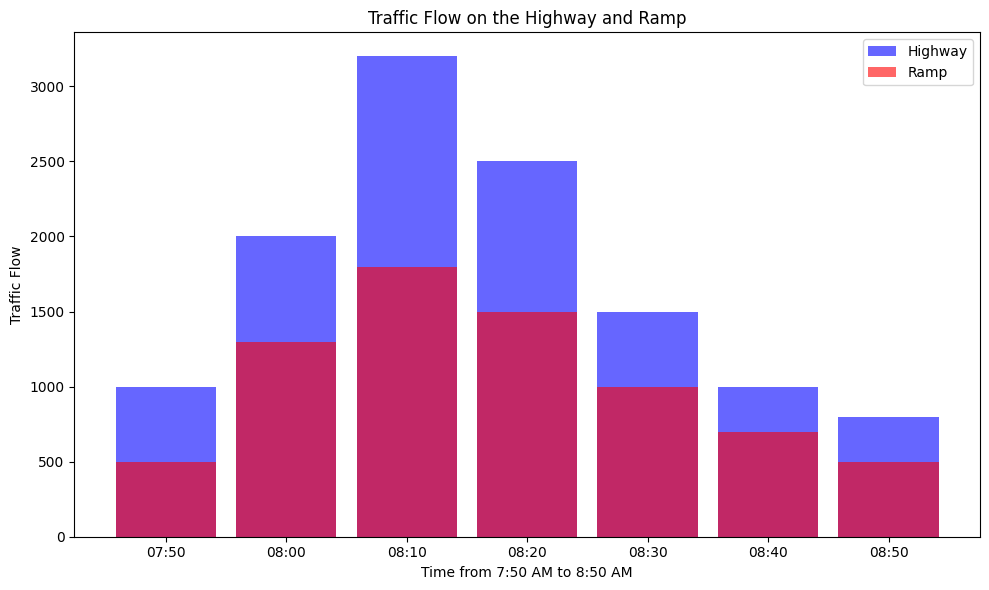

In [4]:
from matplotlib import pyplot as plt

# # Extract data
times = [t for t, _, _ in agent.data_points]
hw_flow = [hw for _, hw, _ in agent.data_points]
ramp_flow = [ramp for _, _, ramp in agent.data_points]

# Generate an array of times from 7:50 AM to 8:50 AM in 10-minute intervals
time_labels = ['07:50', '08:00', '08:10', '08:20', '08:30', '08:40', '08:50']
#time_labels = ['07:50', '08:00', '08:10']

# Re-creating the bar chart with the corrected time labels from 7:50 AM to 8:50 AM
plt.figure(figsize=(10, 6))

# Bars for Highway
plt.bar(times, hw_flow, width=500, label='Highway', color='blue', alpha=0.6)

# Bars for Ramp
plt.bar(times, ramp_flow, width=500, label='Ramp', color='red', alpha=0.6)

plt.xlabel('Time from 7:50 AM to 8:50 AM')
plt.ylabel('Traffic Flow')
plt.title('Traffic Flow on the Highway and Ramp')
plt.xticks(times, time_labels) 
plt.legend()

# Display the chart
plt.tight_layout()
plt.show()

In [5]:
from matplotlib import pyplot as plt

# Define subsampling rate
subsampling_rate = 10  

# Subsampling function
def subsample_data(data, rate):
    return data[::rate]

# Subsample all data except flows
speeds_HW_subsampled = subsample_data(speeds_HW, subsampling_rate)
densities_HW_subsampled = subsample_data(densities_HW, subsampling_rate)
travelTimes_HW_subsampled = subsample_data(travelTimes_HW, subsampling_rate)

speeds_Ramp_subsampled = subsample_data(speeds_Ramp, subsampling_rate)
densities_Ramp_subsampled = subsample_data(densities_Ramp, subsampling_rate)
travelTimes_Ramp_subsampled = subsample_data(travelTimes_Ramp, subsampling_rate)

travelTimesSystem_subsampled = subsample_data(travelTimesSystem, subsampling_rate)

# We also need to subsample the steps to fit the data
steps_subsampled = subsample_data(list(range(len(speeds_HW))), subsampling_rate)

# Calculation of the average values from the full data
avg_flow_HW = sum(flows_HW) / len(flows_HW)
avg_flow_Ramp = sum(flows_Ramp) / len(flows_Ramp)
combined_flow = [fhw + framp for fhw, framp in zip(flows_HW, flows_Ramp)]
avg_combined_flow = sum(combined_flow) / len(combined_flow)

avg_speed_HW = sum(speeds_HW) / len(speeds_HW)
avg_speed_Ramp = sum(speeds_Ramp) / len(speeds_Ramp)
combined_speed = [(shw + sramp) / 2 for shw, sramp in zip(speeds_HW, speeds_Ramp)]
avg_combined_speed = sum(combined_speed) / len(combined_speed)

avg_density_HW = sum(densities_HW) / len(densities_HW)
avg_density_Ramp = sum(densities_Ramp) / len(densities_Ramp)
combined_density = [(dhw + dramp) / 2 for dhw, dramp in zip(densities_HW, densities_Ramp)]
avg_combined_density = sum(combined_density) / len(combined_density)

avg_travelTime_HW = sum(travelTimes_HW) / len(travelTimes_HW)
avg_travelTime_Ramp = sum(travelTimes_Ramp) / len(travelTimes_Ramp)
avg_travelTime_System = sum(travelTimesSystem) / len(travelTimesSystem)

# Calculate combined values for subsampled data
combined_speed_subsampled = [(shw + sramp) / 2 for shw, sramp in zip(speeds_HW_subsampled, speeds_Ramp_subsampled)]
combined_density_subsampled = [(dhw + dramp) / 2 for dhw, dramp in zip(densities_HW_subsampled, densities_Ramp_subsampled)]

### Creating the diagrams ###
plt.figure(figsize=(15, 10)) # Adjustment of the total size for all subplots

# Traffic flow plot (not subsampled)
ax1 = plt.subplot(4, 1, 1)
ax1.plot(flow_steps, flows_HW, label=f'Flow HW (Avg: {avg_flow_HW:.2f})')
ax1.plot(flow_steps, flows_Ramp, label=f'Flow Ramp (Avg: {avg_flow_Ramp:.2f})')
ax1.plot(flow_steps, combined_flow, label=f'Combined Flow (Avg: {avg_combined_flow:.2f})', linestyle='--')
ax1.set_ylabel('Flow (Veh/h)')
ax1.legend()

# Bar chart for traffic light phases in ax1
colors = ['green' if phase == 0 else 'red' for phase in trafficLightPhases]
ax1b = ax1.twinx()
balkenhoehe = 1  
ax1b.bar(simulationStepsArray, [balkenhoehe]*len(simulationStepsArray), color=colors, alpha=1)
ax1b.set_ylim(0, 20)
ax1b.set_yticks([]) 

# Speed plot (subsampled)
ax2 = plt.subplot(4, 1, 2)
ax2.plot(steps_subsampled, speeds_HW_subsampled, label=f'Speed HW (Avg: {avg_speed_HW:.2f})')
ax2.plot(steps_subsampled, speeds_Ramp_subsampled, label=f'Speed Ramp (Avg: {avg_speed_Ramp:.2f})')
ax2.plot(steps_subsampled, combined_speed_subsampled, label=f'Combined Speed (Avg: {avg_combined_speed:.2f})', linestyle='--')
ax2.set_ylabel('Speed (m/s)')
ax2.legend()

# Bar chart for traffic light phases in ax2
ax2b = ax2.twinx()
balkenhoehe = 1  
ax2b.bar(simulationStepsArray, [balkenhoehe]*len(simulationStepsArray), color=colors, alpha=1)
ax2b.set_ylim(0, 20) 
ax2b.set_yticks([]) 

# Density plot (subsampled)
ax3 = plt.subplot(4, 1, 3)
ax3.plot(steps_subsampled, densities_HW_subsampled, label=f'Density HW (Avg: {avg_density_HW:.2f})')
ax3.plot(steps_subsampled, densities_Ramp_subsampled, label=f'Density Ramp (Avg: {avg_density_Ramp:.2f})')
ax3.plot(steps_subsampled, combined_density_subsampled, label=f'Combined Density (Avg: {avg_combined_density:.2f})', linestyle='--')
ax3.set_ylabel('Density (Veh/km/lane)')
ax3.legend()

# Bar chart for traffic light phases in ax3
ax3b = ax3.twinx()
balkenhoehe = 1
ax3b.bar(simulationStepsArray, [balkenhoehe]*len(simulationStepsArray), color=colors, alpha=1)
ax3b.set_ylim(0, 20)
ax3b.set_yticks([]) 

# Travel time plot (subsampled)
ax4 = plt.subplot(4, 1, 4)
ax4.plot(steps_subsampled, travelTimes_HW_subsampled, label=f'Travel Time HW (Avg: {avg_travelTime_HW:.2f})')
ax4.plot(steps_subsampled, travelTimes_Ramp_subsampled, label=f'Travel Time Ramp (Avg: {avg_travelTime_Ramp:.2f})')
ax4.plot(steps_subsampled, travelTimesSystem_subsampled, label=f'Travel Time System (Avg: {avg_travelTime_System:.2f})', linestyle='--')
ax4.set_ylabel('Travel Time (s)')
ax4.set_xlabel('Time (s)')
ax4.legend()

# Bar chart for traffic light phases in ax4
ax4b = ax4.twinx()
balkenhoehe = 1  
ax4b.bar(simulationStepsArray, [balkenhoehe]*len(simulationStepsArray), color=colors, alpha=1)
ax4b.set_ylim(0, 20) 
ax4b.set_yticks([]) 

plt.tight_layout()
plt.show()


NameError: name 'speeds_HW' is not defined